# TensorFlow Basics


Tagline: An open source software library for Machine Intelligence 

Peoples are using TensorFlow than other numerical computation libraries such as NumPy because of it's performance compared to others and API such as automatic differentiation which is not available with librares such as NumPy. But it comes with a cost which is harder to be grasp. 

Definition:
TensorFlow is an open source software library for numerical computation using data flow graphs. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them. The flexible architecture allows you to deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device with a single API. TensorFlow was originally developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research, but the system is general enough to be applicable in a wide variety of other domains as well.



*** TensorFlow provides an extensive suite of functions and classes that allow users to define models from scratch. Some high level API: Keras, TFLearn, Pretty Tensor ***

Let's start with simple example:

First, let's see how NumPy doing the calculation:

In [1]:
import numpy as np

x = np.random.normal(size=[10, 10])
y = np.random.normal(size=[10, 10])
z = np.dot(x, y)

print(z)

[[  0.79864132  -2.92494169   2.15749021   0.43238863  -1.22440948
    2.70239971   6.39052641  -4.77447523  -2.14256926  -3.95851203]
 [ -1.73917544   0.79896862   4.09788311  -4.49180321  -3.29304679
    4.00066707   1.16896964  -3.3800288    3.3051081   -4.36863649]
 [  0.34817725   0.45814296   0.45039137   2.59341945  -0.0882901
   -2.0748372   -2.8045185    5.18790623  -1.1000049    1.87535305]
 [  0.79568601  -3.08648656  -0.2095649    3.17445412   0.22162795
   -0.95796808  -1.55527268   2.86115215  -1.22661464  -7.33648561]
 [ -1.7145698   -0.91450728   1.71770563   3.47453904  -3.47483777
    5.18585771  -4.1768278    4.1060129    0.11398739  -2.54284014]
 [  4.58247912  -2.03480258  -2.93339815  -0.35774426   1.82220835
   -7.91056653   0.84872166   1.20382397   0.62028544   2.22869093]
 [ -1.91568283   1.59859883  -0.70810805   2.10942531  -2.13853695
    7.23741629  -0.35939676  -2.9773057   -0.13490675   0.02027615]
 [  3.41857987   3.08398607  -3.11282452  -1.06105848   

Now the same calculation but using TensorFlow:

In [2]:
import tensorflow as tf

x = tf.random_normal([10, 10])
y = tf.random_normal([10, 10])
z = tf.matmul(x, y)

sess = tf.Session()
z_val = sess.run(z)

print(z_val)

[[ 1.38919055 -3.29116774 -0.90299618  0.51196492 -3.16564083 -1.44959283
  -1.57662809  0.87347829  0.69279891  2.32820058]
 [ 0.93376535 -2.50095987  0.99220043 -0.74768162 -5.8233161  -0.53962106
  -0.3932358   1.44146132  0.03110927 -2.23935223]
 [ 2.19249392 -0.83022958 -2.52283692  0.04073209  3.45099092 -1.32514
   0.08514584 -4.93429136  0.28642789  0.49008313]
 [-4.00037098  1.56587291  1.78096271 -0.72725469 -3.82490349  2.24305415
  -0.43331075 -1.42545247 -2.21652031  2.30477238]
 [ 1.55122268 -0.09182063 -2.95913458  3.70903206 -5.98783875 -3.21442151
  -0.5555715   2.42660856  2.24476695  0.04709414]
 [-0.41760272  5.09402657 -0.01462525 -0.40302134  4.72959852  2.43338013
  -1.13868022  2.53180957 -0.54858977  3.66948175]
 [ 0.07477707  0.88336062  4.93136215 -4.56826687  4.42805386  3.24167275
   4.17551804 -5.42191982 -5.31983137 -4.69459152]
 [-1.9056071   0.13927814  1.86388159 -1.45403063  1.29842246  1.22508144
   0.17838845 -1.41202021 -1.60341775 -0.68652427]
 [ 

When we check the `z` value in NumPy calculation, it will show us the value directly but not when we are using TensorFlow. If we try printing the value `z` directly we will get something like this :

In [3]:
print(z)

Tensor("MatMul:0", shape=(10, 10), dtype=float32)


Since both `x` and `y` have a fully defined shape, TensorFlow is able to infer the shape of the tensor as well as its type. In order to compute the value, we need to create a `Session` and evaluate it using `Session.run()` method.

## Lazy Instantiation 
Also known as `Lazy Loading`, basically it's a tactic to delay those expensive process, creation of object, or calculation of value until first time it needed the value. 

TensorFlow doesn't immediately run the operation that are defined but rather creates corresponding nodes in a graph that can be evaluated with `Session.run()` method. This also allow TensorFlow to do optimizations at run time to determine the optimal order of execution and possible trimming of unused nodes.

## Feeding data to Tensorflow
TensorFlow is designed to work efficiently with large amount of data. So it's actually important not to starve your TensorFlow model in order to maximize its performance. Here are ways that you can feed your data to TensorFlow:
- Constants
- Placeholders
- Variables

## Constants
Simplest approach to embed the data in your graph as constant. It's very efficient but not flexible. For example you might working with another dataset which need you to rewrite the graph. Also, you have to load all of your data at once and keep it in memory which would only work with small datasets.

In [4]:
import tensorflow as tf
import numpy as np

# Init arrays of floats randomly with size of 100
actual_data = np.random.normal(size=[100])

# Assigning tf constant with actual_data
data = tf.constant(actual_data)

In [5]:
# As usual, tf is lazy instatiation aka lazy loading
sess = tf.Session()
sess.run(data)

array([-2.11125327,  0.31116626, -0.44320385,  0.21424191, -1.30622647,
       -1.45839005, -2.1262636 ,  0.86244901, -0.26924027,  2.0147088 ,
       -0.282714  , -1.38328688, -0.62248338, -0.23936666,  1.03551652,
       -0.93957741, -0.15013239, -1.23622204, -1.58400713,  1.16253377,
       -0.34044783,  0.10251725,  1.1135783 , -0.44516114,  0.57088576,
       -0.59209241, -1.61723396, -1.37417653, -0.317569  , -1.39653873,
       -0.51558159, -0.79938789, -0.61654392,  0.16362517, -0.13190215,
       -1.52326578, -1.23608603,  0.21165345,  0.61656848, -0.21257236,
       -1.42540733,  0.6497701 , -0.38405807, -0.54743543, -0.75259004,
       -0.7734046 , -0.87185913, -0.89581271, -0.67435721, -0.91149712,
       -0.20432857,  0.95816556,  0.44313059,  0.81798368,  0.70447087,
       -0.68699299,  1.308701  , -0.72944093,  0.95003788, -1.20570819,
        1.29503729,  0.25851547, -1.90361648,  0.60129057,  3.03306857,
        0.60238562, -1.80713167,  0.85687825, -1.1754875 ,  0.95

## Placeholders
Using placeholders solves problems by constant:

In [6]:
import tensorflow as tf
import numpy as np

data = tf.placeholder(tf.float32)

prediction = tf.add(data, 2)

actual_data = np.random.normal(size=[10])

print(actual_data)
tf.Session().run(prediction, feed_dict={ data: actual_data })

[ 1.29323496  0.04465758  0.18680406  0.05719432  1.52607832 -0.42247591
  0.03733328  1.10707901 -0.81154696  1.51152253]


array([ 3.29323483,  2.04465747,  2.18680406,  2.05719423,  3.52607822,
        1.57752407,  2.03733325,  3.10707903,  1.18845296,  3.51152253], dtype=float32)

As TensorFlow is a lazy loading, the data need to be feed later through the `feed_dict` argument in `Session.run()` functon. Note that if we run `Session.run` without the value of data in this case will result in an error.

## Variables

What we have done until now mostly are using `Constants` which the value can't be change. Unlike constants, variables can be updated. 

In [7]:
import tensorflow as tf

a = tf.constant(1)
b = tf.constant(2)
a = a + b

tf.Session().run(a)

3

We can't update the value.

In [8]:
# Error expected as constant can't be update/assign with new value
a = tf.Variable(1)
b = tf.constant(2)
assign = tf.assign(b, a + b)

sess = tf.Session()

# Since we are using variables we first need to initialize them.
sess.run(tf.global_variables_initializer())

print(sess.run(assign))

AttributeError: 'Tensor' object has no attribute 'assign'

In [9]:
# Successfully update `b` value
a = tf.Variable(1)
b = tf.constant(2)
assign = tf.assign(a, a + b)

sess = tf.Session()

# Since we are using variables we first need to initialize them.
sess.run(tf.global_variables_initializer())

print(sess.run(assign))

3


## Example #1 : Add 2 numbers
First TensorFlow program. Let's try to add two numbers.

In [10]:
import tensorflow as tf
from datetime import datetime, timedelta

a = tf.constant(2, name="constant_a")
b = tf.constant(5, name="constant_b")
c = tf.add(a,b, name="add_ab")

summ_path = "./tensorflow_logs/example_1/" + datetime.now().strftime("%Y%m%d-%H%M%S") 

sess = tf.Session()
writer = tf.summary.FileWriter(summ_path, sess.graph)
c_val = sess.run(c)
writer.close()

print(c_val)

7


## Example #2 : Linear Regression (Boston House Price Data)

In [11]:
import tensorflow as tf
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from tensorflow.contrib import learn
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn import metrics
from __future__ import print_function

In [12]:
# As TF already have the boston data
boston = learn.datasets.load_dataset('boston')

x, y = boston.data, boston.target
print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [13]:
# Split the data for test and training
# random_state is the seed number
train_x, test_x, train_y, test_y = cross_validation.train_test_split(x, y, test_size=0.2, random_state=42)
print(test_x.shape)
print(test_y.shape)
print(train_x.shape)
print(train_y.shape)

(102, 13)
(102,)
(404, 13)
(404,)


In [14]:
# Preprocessing
# Scale down the numbers using standardization
scaler = preprocessing.StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)
train_y = scaler.fit_transform(train_y)
test_y = scaler.fit_transform(test_y)

# Seems like there are problems if we didn't reshape the `y` value
train_y = train_y.reshape([-1, 1])
test_y = test_y.reshape([-1, 1])

/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

In [15]:
# Create placeholder for inputs and outputs
inputs = tf.placeholder(tf.float32, [None, 13], name="Input_X")
outputs = tf.placeholder(tf.float32, [None, 1], name="Y_Predict")
weights = tf.Variable(tf.zeros([13, 1]), name="Weights")

In [16]:
# Linear Regression Implementation
learning_rate = 0.001
training_epochs = 10000

y_ = tf.matmul(inputs, weights)
cost = tf.reduce_mean(tf.square(y_ - outputs), name="cost")
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [20]:
# Let's run it

summ_path = "./tensorflow_logs/example_2/" + datetime.now().strftime("%Y%m%d-%H%M%S") 
tf.summary.scalar("cost", cost)
summary_op = tf.summary.merge_all()

sess = tf.Session()
writer = tf.summary.FileWriter(summ_path, sess.graph)

# Since we are using variables we first need to initialize them.
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    _, summary = sess.run([training_step, summary_op], feed_dict={ inputs: train_x, outputs: train_y })
    writer.add_summary(summary, epoch)
    
writer.close()

In [21]:
# Calculating the MSE
pred_y = sess.run(y_, feed_dict={ inputs: test_x })
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse)) 

MSE: 0.3328


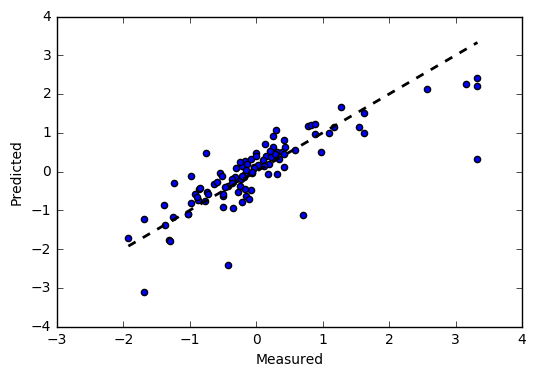

In [22]:
fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()